# BigMart - EDA & Preprocessing

In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')
%matplotlib inline

In [528]:
df = pd.read_csv('bigmart_train.csv')
test_df = pd.read_csv('bigmart_test.csv')
df.shape, test_df.shape

((8523, 12), (5681, 11))

In [529]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [530]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [531]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## EDA

### Univariate Analysis

In [532]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [533]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

There are categories that are repeated in the form of abbreviations. For example some records are marked as abbreviated categories- 'LF' and 'low fat', which essentially belong to the same category 'Low Fat'.  

We will create unique categories and fix this issue while encoding the features.

In [534]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [535]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [536]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [537]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [538]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

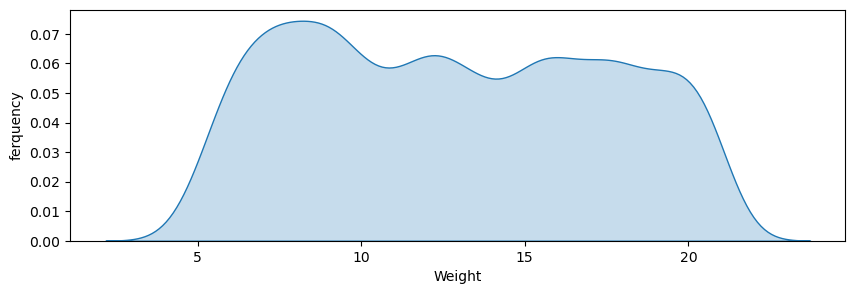

In [539]:
plt.figure(figsize= (10,3), dpi= 100)
sns.kdeplot(x= df['Item_Weight'], fill= True)
plt.xlabel('Weight')
plt.ylabel('ferquency')
plt.show()

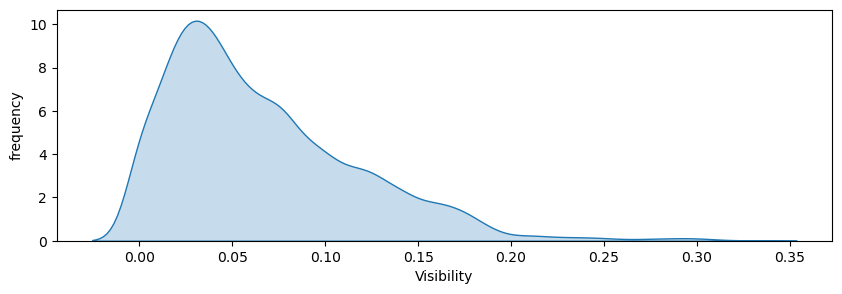

In [540]:
plt.figure(figsize= (10,3), dpi= 100)
sns.kdeplot(x= df['Item_Visibility'], fill= True)
plt.xlabel('Visibility')
plt.ylabel('frequency')
plt.show()

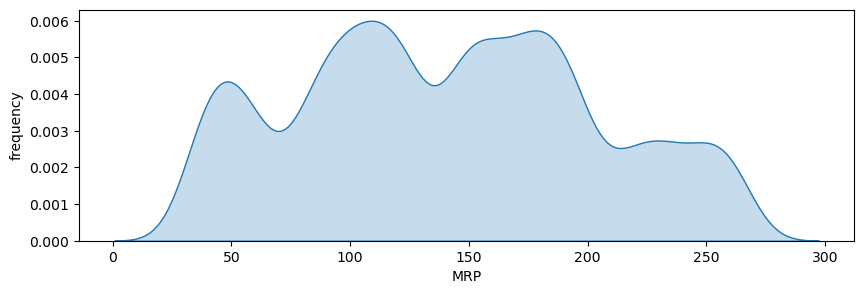

In [541]:
plt.figure(figsize= (10,3), dpi= 100)
sns.kdeplot(x= df['Item_MRP'], fill= True)
plt.xlabel('MRP')
plt.ylabel('frequency')
plt.show()

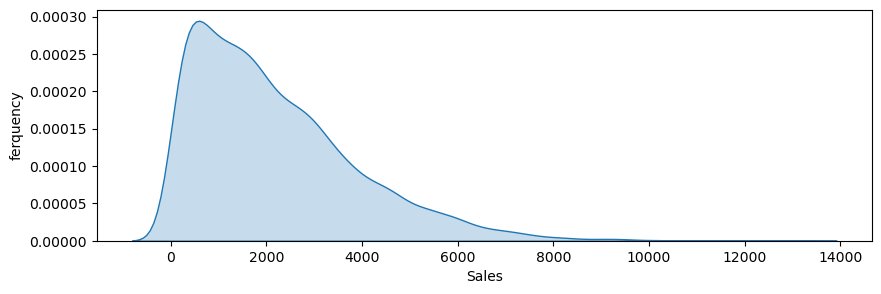

In [542]:
plt.figure(figsize= (10,3), dpi= 100)
sns.kdeplot(x= df['Item_Outlet_Sales'], fill= True)
plt.xlabel('Sales')
plt.ylabel('ferquency')
plt.show()

We can see there are outliers present in the Item_Outlet_Sales

### Bivariate Analysis

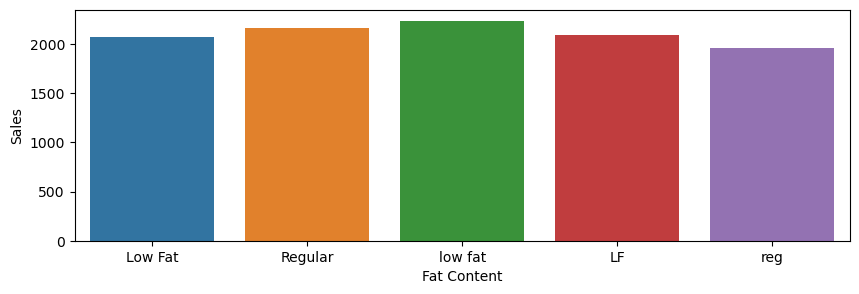

In [543]:
plt.figure(figsize= (10,3), dpi= 100)
sns.barplot(x= df['Item_Fat_Content'].unique(), y= df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean())
plt.xlabel('Fat Content')
plt.ylabel('Sales')
plt.show()

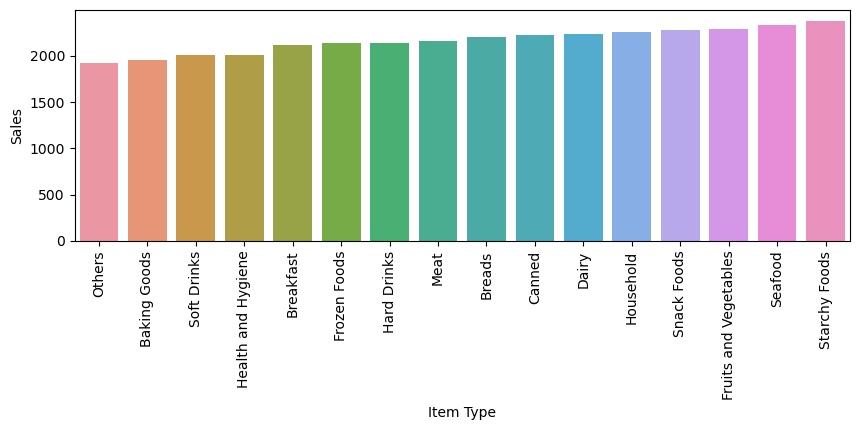

In [544]:
a= pd.DataFrame(df.groupby('Item_Type')['Item_Outlet_Sales'].mean())
a = a.sort_values(by= 'Item_Outlet_Sales')

plt.figure(figsize= (10,3), dpi= 100)
sns.barplot(x= a.index, y= a['Item_Outlet_Sales'])
plt.xlabel('Item Type')
plt.xticks(rotation= 90)
plt.ylabel('Sales')
plt.show()

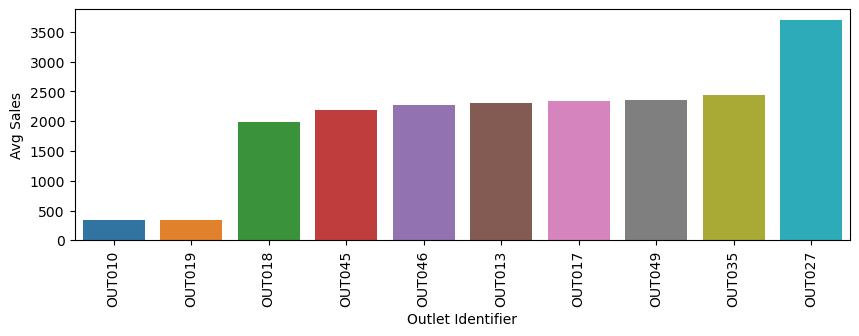

In [545]:
a= pd.DataFrame(df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean())
a = a.sort_values(by= 'Item_Outlet_Sales')

plt.figure(figsize= (10,3), dpi= 100)
sns.barplot(x= a.index, y= a['Item_Outlet_Sales'])
plt.xlabel('Outlet Identifier')
plt.xticks(rotation= 90)
plt.ylabel('Avg Sales')
plt.show()

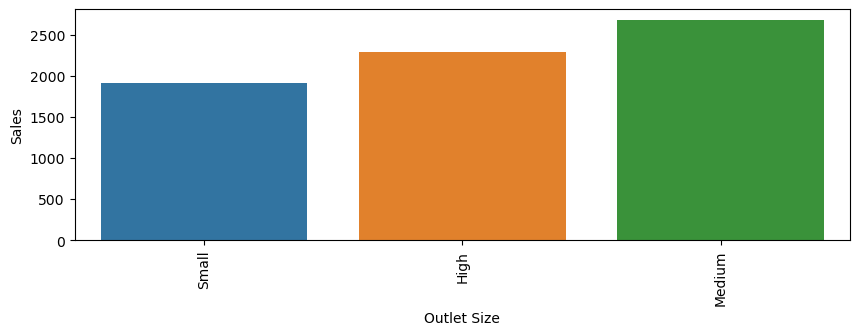

In [546]:
a= pd.DataFrame(df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean())
a = a.sort_values(by= 'Item_Outlet_Sales')

plt.figure(figsize= (10,3), dpi= 100)
sns.barplot(x= a.index, y= a['Item_Outlet_Sales'])
plt.xlabel('Outlet Size')
plt.xticks(rotation= 90)
plt.ylabel('Sales')
plt.show()

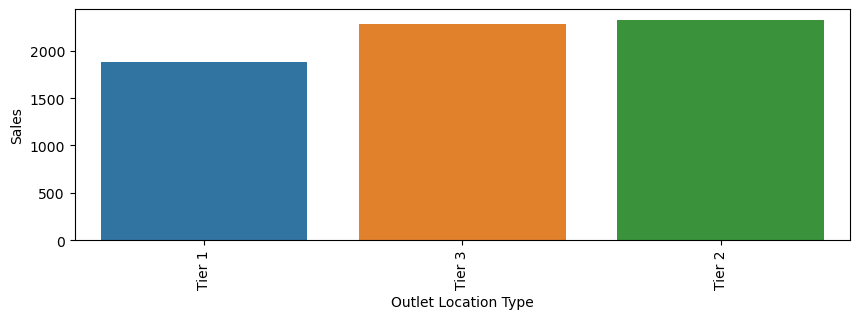

In [547]:
a= pd.DataFrame(df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean())
a = a.sort_values(by= 'Item_Outlet_Sales')

plt.figure(figsize= (10,3), dpi= 100)
sns.barplot(x= a.index, y= a['Item_Outlet_Sales'])
plt.xlabel('Outlet Location Type')
plt.xticks(rotation= 90)
plt.ylabel('Sales')
plt.show()

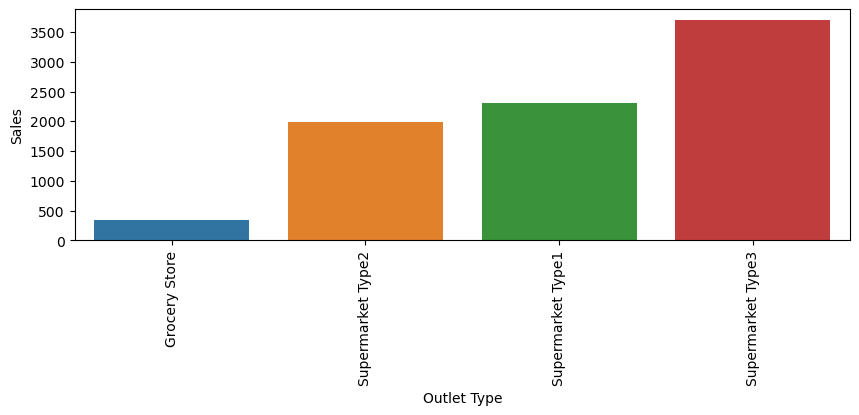

In [548]:
a= pd.DataFrame(df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean())
a = a.sort_values(by= 'Item_Outlet_Sales')

plt.figure(figsize= (10,3), dpi= 100)
sns.barplot(x= a.index, y= a['Item_Outlet_Sales'])
plt.xlabel('Outlet Type')
plt.xticks(rotation= 90)
plt.ylabel('Sales')
plt.show()

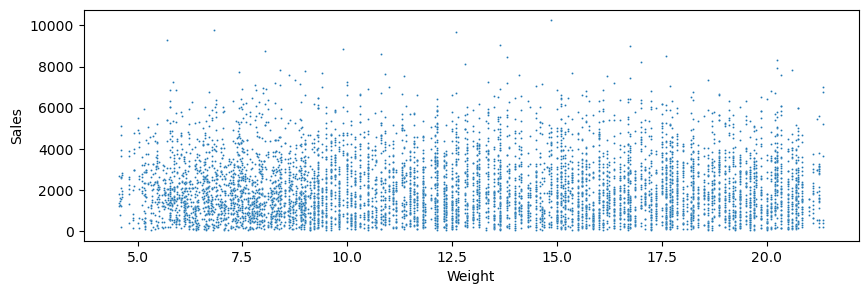

In [549]:
plt.figure(figsize= (10,3), dpi= 100)
sns.scatterplot(x= df['Item_Weight'], y= df['Item_Outlet_Sales'], s= 2)
plt.xlabel('Weight')
plt.ylabel('Sales')
plt.show()

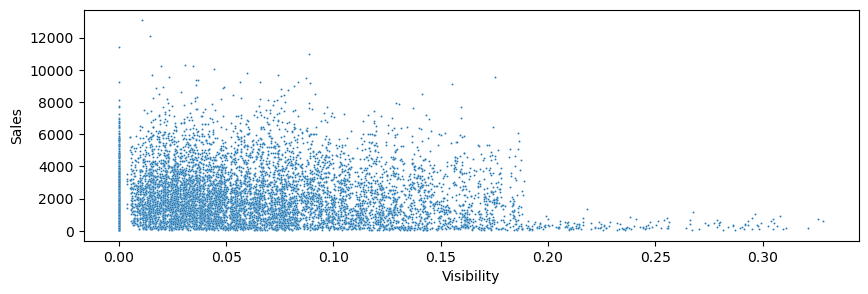

In [550]:
plt.figure(figsize= (10,3), dpi= 100)
sns.scatterplot(x= df['Item_Visibility'], y= df['Item_Outlet_Sales'], s= 2)
plt.xlabel('Visibility')
plt.ylabel('Sales')
plt.show()

Surprisingly Items with lower Visibility have higher sales than the items that have higher visibility. This might be because there's only a limited amount of space in the store which has higher visibility and can accomodate only a small fraction of items. While the sections with poor visibility have a higher storage capacity. 

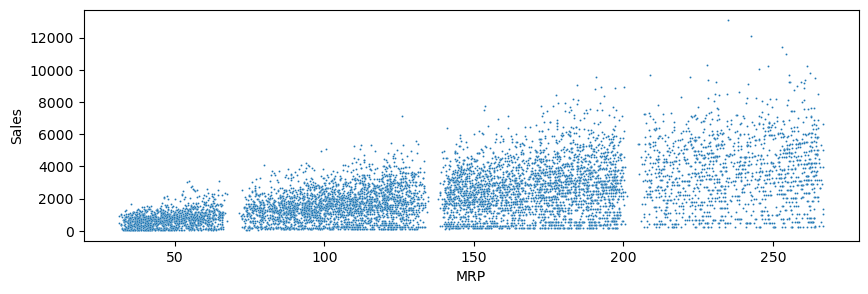

In [551]:
plt.figure(figsize= (10,3), dpi= 100)
sns.scatterplot(x= df['Item_MRP'], y= df['Item_Outlet_Sales'], s= 2)
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.show()

### Missing Value and Outlier Treatment

In [552]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [553]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We will impute Missing values in the 'Item_Weight' column first. We will check the Item_Weight for each Item_Identifier

In [554]:
a = pd.DataFrame(df.groupby('Item_Identifier')['Item_Weight'].mean())
a.head(2)

,Item_Weight
Item_Identifier,
DRA12,11.60
DRA24,19.35


In [555]:
df = df.merge(a, how= 'left', on = 'Item_Identifier')

In [556]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight_x                1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_y                   4
dtype: int64

In [557]:
df.drop(columns= 'Item_Weight_x', axis=1, inplace= True)
df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92


In [558]:
df[df['Item_Weight_y'].isnull() == True]

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
927,FDN52,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,NaN
1922,FDK57,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,NaN
4187,FDE52,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,NaN
5022,FDQ60,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,NaN


We will replce these missing values with the average Item_Weight of the whole dataset.

In [559]:
df['Item_Weight_y'].fillna(df['Item_Weight_y'].mean(), inplace= True)

In [560]:
df.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_y                   0
dtype: int64

### test_df (missing value imputation)
Similarly we will impute missing Item_weight values for test_df as well.

In [561]:
test_df[test_df['Item_Weight'].isnull() == True].shape

(976, 11)

In [562]:
a = pd.DataFrame(test_df.groupby('Item_Identifier')['Item_Weight'].mean())
a.head(2)

,Item_Weight
Item_Identifier,
DRA12,11.60
DRA24,19.35


In [563]:
test_df = test_df.merge(a, how= 'left', on = 'Item_Identifier')

In [564]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight_x                 976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight_y                  20
dtype: int64

In [565]:
test_df.drop(columns= 'Item_Weight_x', axis=1, inplace= True)
test_df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_y
0,FDW58,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.75
1,FDW14,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,8.30


In [566]:
test_df['Item_Weight_y'].fillna(test_df['Item_Weight_y'].mean(), inplace= True)

In [567]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight_y                   0
dtype: int64

#### Outlet_size
Now we will deal with 'Outlet_Size' column and impute its missing values.

In [568]:
a = df[['Outlet_Identifier', 'Outlet_Size']].drop_duplicates()
a

,Outlet_Identifier,Outlet_Size
0,OUT049,Medium
1,OUT018,Medium
3,OUT010,NaN
4,OUT013,High
7,OUT027,Medium
8,OUT045,NaN
9,OUT017,NaN
11,OUT046,Small
19,OUT035,Small
23,OUT019,Small


In [569]:
df[df['Outlet_Identifier'].isin(['OUT010', 'OUT045', 'OUT017'])].shape

(2410, 12)

All the missing values belong to the Outlets (OUT010, OUT045, OUT017) which do not have even a single record identifying it's Size. So we will have to impute missing values with the category Mode.

In [570]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [571]:
df['Outlet_Size'].fillna('Medium', inplace = True)

In [572]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_y                0
dtype: int64

#### test_df

In [573]:
a = test_df[['Outlet_Identifier', 'Outlet_Size']].drop_duplicates()
a

,Outlet_Identifier,Outlet_Size
0,OUT049,Medium
1,OUT017,NaN
2,OUT010,NaN
4,OUT027,Medium
5,OUT046,Small
6,OUT018,Medium
8,OUT045,NaN
12,OUT019,Small
14,OUT013,High
21,OUT035,Small


In [574]:
test_df['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [575]:
test_df['Outlet_Size'].fillna('Medium', inplace = True)

In [576]:
test_df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight_y                0
dtype: int64

### Outlier Treatment

We will treat outliers only for the training dataset.

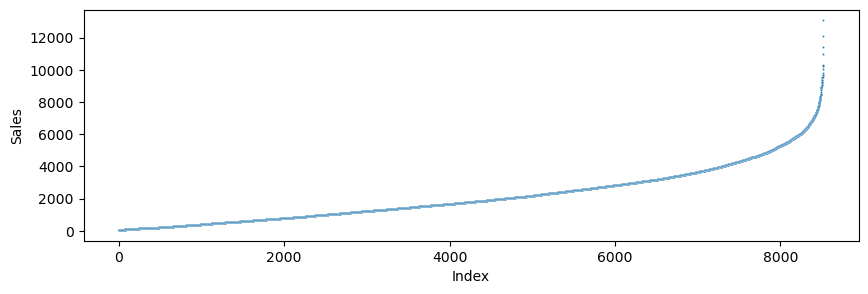

In [577]:
plt.figure(figsize= (10,3), dpi= 100)
sns.scatterplot(x= df['Item_Outlet_Sales'].index, y= df['Item_Outlet_Sales'].sort_values(ascending= True), s=2)
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()

We can see, there are certain records which have observed a sale of more than $8000. Let's check the number of such records and let's analyze how dropping these records affects rest of the data.

In [578]:
df[df['Item_Outlet_Sales'] > 8000].shape

(50, 12)

As we have only 50 such records, dropping them would not impact the information stored in the rest of the data. So let's go ahead and commit these changes.

In [579]:
df = df[df['Item_Outlet_Sales'] <= 8000]
df.shape

(8473, 12)

### Preprocessing

#### (A). Category Encoding

Item_Fat_Content

In [580]:
df['Item_Fat_Content'].value_counts()

Low Fat    5059
Regular    2870
LF          316
reg         117
low fat     111
Name: Item_Fat_Content, dtype: int64

In [581]:
fat = {'Low Fat': 1,
       'Regular': 2,
       'LF': 1,
       'reg': 2,
       'low fat': 1}

df['Item_Fat_Content'] = df['Item_Fat_Content'].map(fat)
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].map(fat)

In [582]:
df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92


Outlet_Size

In [583]:
df['Outlet_Size'].value_counts()

Medium    5159
Small     2384
High       930
Name: Outlet_Size, dtype: int64

In [584]:
outsize = {'Small': 1,
       'Medium': 2,
       'High': 3}

df['Outlet_Size'] = df['Outlet_Size'].map(outsize)
test_df['Outlet_Size'] = test_df['Outlet_Size'].map(outsize)

Outlet_Location_Type

In [585]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3312
Tier 2    2776
Tier 1    2385
Name: Outlet_Location_Type, dtype: int64

In [586]:
locationtype = {'Tier 1': 1,
                'Tier 2': 2,
                'Tier 3': 3}

df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map(locationtype)
test_df['Outlet_Location_Type'] = test_df['Outlet_Location_Type'].map(locationtype)

* Apart from these three categorical variables, other categorical features do not have any ordinality. So we will have to One-Hot Encode them
* Item_Identifier feature will be dropped because it has a very high cardinality and will only increase dimensionality of the data and complexity of the model.

In [587]:
df = df.drop(columns= 'Item_Identifier', axis=1)
test_df = test_df.drop(columns= 'Item_Identifier', axis=1)

In [588]:
encoded_df = pd.get_dummies(df)
encoded_test_df = pd.get_dummies(test_df)

In [591]:
encoded_df.to_csv('final_train.csv', index= False)
encoded_test_df.to_csv('final_test.csv', index= False)